In [1]:
# Loading packages
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
import numpy as np

In [2]:
# Load data
data = pd.read_excel(r"C:\Users\C5821119\Downloads\pone.0212445.s004.xlsx", header=1)

In [3]:
data

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789
...,...,...,...,...,...,...,...,...,...
99,Mangaung,MAN,Fay-Heriott,9.147425,6.725917,12.325536,101520,74646,136792
100,Nelson Mandela Bay Metro,NMA,Survey,8.300000,3.400000,13.200000,97459,39923,154995
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.054060,6.128703,13.179704,106313,71964,154757
102,City of Tshwane,TSH,Survey,11.700000,7.388000,16.012000,361450,228239,494661


In [4]:
# Converting data to dataframe
df = pd.DataFrame(data)

# Calculate and output the following:

### What is the total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate?

In [5]:
survey_data = df[df['Estimate'] == 'Survey']
total_number_hiv = survey_data['NoPLHIV'].sum()
print(f'Total number of NoPLHIV: {total_number_hiv}')

Total number of NoPLHIV: 6409903


### What is the average NoPLHIV of the two estimates used for “Xhariep”?

In [6]:
Xhariep_data = df[df['District'] == 'Xhariep']
avg_plhiv = mt.floor(Xhariep_data['NoPLHIV'].mean())
print(f'Average NoPLHIV in Xhariep district: {avg_plhiv}')

Average NoPLHIV in Xhariep district: 12247


### Add a column and populate it with the number of people not living with HIV for each row.

In [7]:
df['Nothiv'] = df['NoPLHIV']*(100 - df['Prevalence_%'])//df['Prevalence_%']
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,Nothiv
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,650776.0
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,651516.0
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3659845.0
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3628178.0
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,407290.0


In [22]:
# Test if the data is correct
(100*df['NoPLHIV'])/(df['NoPLHIV'] + df['Nothiv'])

0      13.600004
1      13.501299
2       5.200000
3       6.020043
4       2.700004
         ...    
99      9.147429
100     8.300006
101     9.054064
102    11.700001
103    11.024861
Length: 104, dtype: float64

### What is the total NoPLHIV in all the cities (districts with “city” or “metro” in the name)? 

In [9]:
city_metro_data = df[df['District'].str.lower().str.contains('city|metro')]
Total_city_metro_data = city_metro_data['NoPLHIV'].sum()
print(f'Total NoPLHIV in city or metro: {Total_city_metro_data}')

Total NoPLHIV in city or metro: 2572733


### Remove all the special/non-alphabetic characters from the dataframe column names. Print the resultant field names output. 

In [10]:
# Removing non alphabetic characters
df.columns = df.columns.str.replace('[^a-zA-Z]', '', regex=True)
df.columns

Index(['District', 'Code', 'Estimate', 'Prevalence', 'PrevalenceLCL',
       'PrevalenceUCL', 'NoPLHIV', 'NoPLHIVLCL', 'NoPLHIVUCL', 'Nothiv'],
      dtype='object')

### Using matplotlib, plot each Prevalence confidence interval (Prevalence_UCL and Prevalence_LCL) for Districts that end in “i”; according to Fay-Herriott estimates on 1 graph. 

In [11]:
# Extracting the relavent data
plot_data = df[(df['District'].str.endswith('i'))&(df['Estimate']=='Fay-Heriott')]

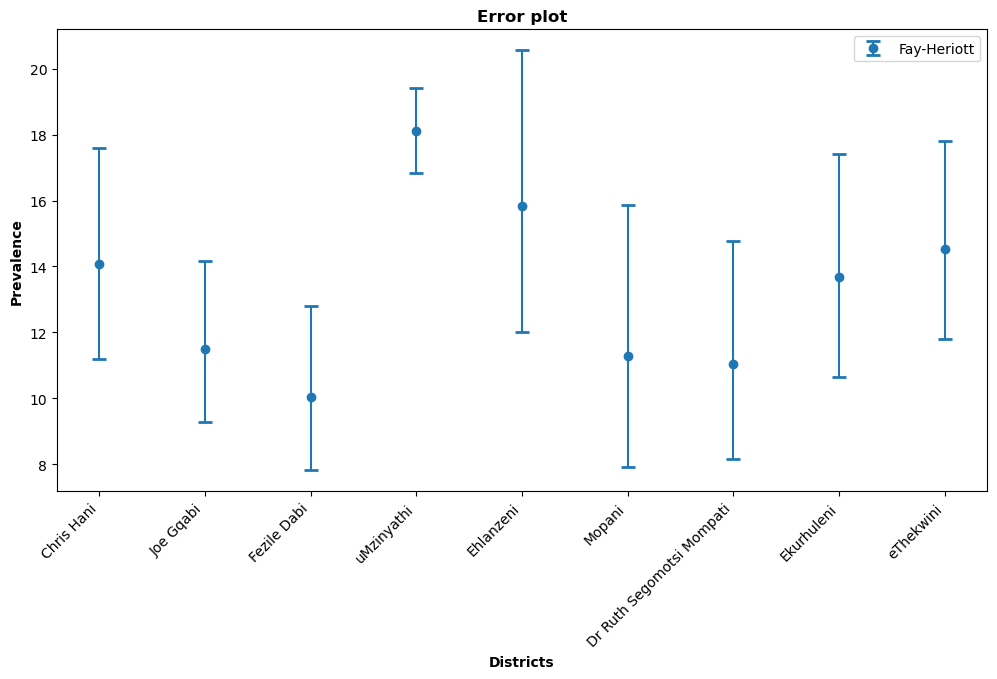

In [23]:
# Plotting the errorbars
plt.figure(figsize = (12, 6))
plt.errorbar(x=plot_data['District'], y=plot_data['Prevalence'],
            yerr = [plot_data['Prevalence'] - plot_data['PrevalenceLCL'], 
                    plot_data['PrevalenceUCL'] - plot_data['Prevalence']],
            fmt='o', capsize=5, capthick=2, label = 'Fay-Heriott')
plt.legend()
plt.title('Error plot', fontweight='bold')
plt.xlabel('Districts', fontweight='bold')
plt.ylabel('Prevalence', fontweight='bold')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

### Other Work

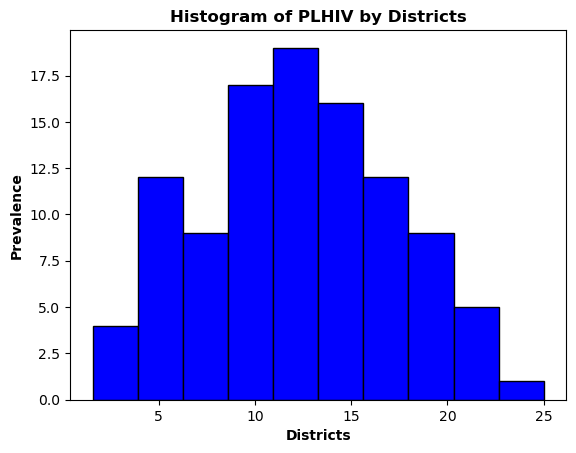

In [19]:
plt.hist(df['Prevalence'], color='blue', edgecolor = 'black', bins = 10)
plt.xlabel('Districts', fontweight='bold')
plt.ylabel('Prevalence', fontweight='bold')
plt.title('Histogram of PLHIV by Districts', fontweight='bold')

# Rotating x-axis labels for better readability (optional)
#plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
categories = df['District']
values = df['NoPLHIV']

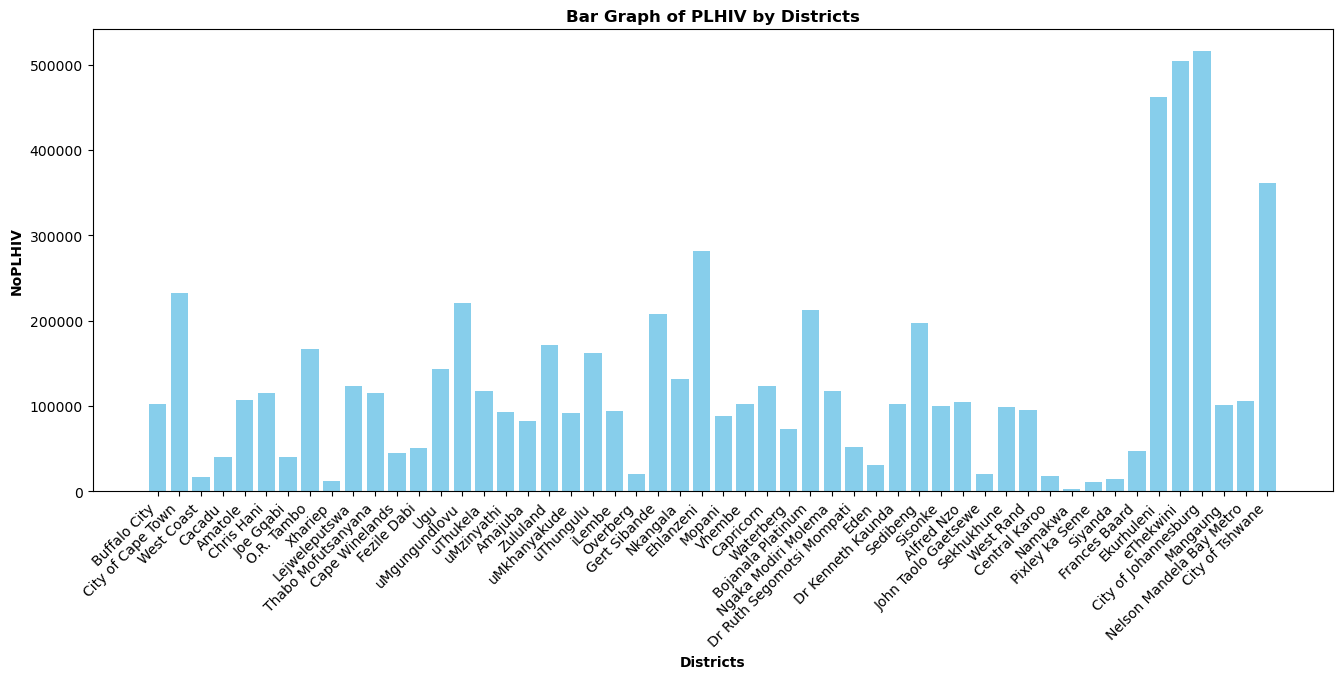

In [15]:
plt.figure(figsize = (16, 6))
plt.bar(categories, values, color='skyblue')
plt.xlabel('Districts', fontweight='bold')
plt.ylabel('NoPLHIV', fontweight='bold')
plt.title('Bar Graph of PLHIV by Districts', fontweight='bold')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

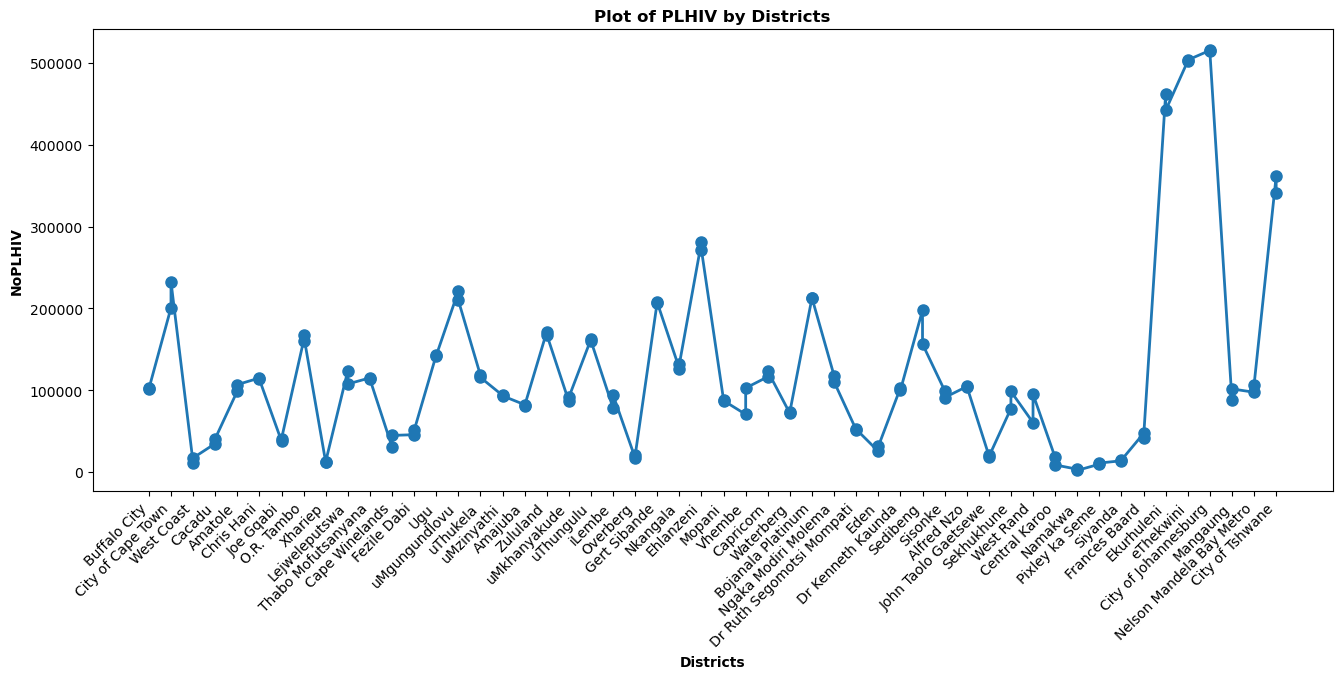

In [16]:
plt.figure(figsize=(16, 6))
plt.plot(categories, values, marker = 'o', linestyle='-', linewidth=2, markersize=8, label='Your Data')
plt.xlabel('Districts', fontweight='bold')
plt.ylabel('NoPLHIV', fontweight='bold')
plt.title('Plot of PLHIV by Districts', fontweight='bold')
#plt.legend()
# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [17]:
df.head()

,District,Code,Estimate,Prevalence,PrevalenceLCL,PrevalenceUCL,NoPLHIV,NoPLHIVLCL,NoPLHIVUCL,Nothiv
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,650776.0
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,651516.0
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3659845.0
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3628178.0
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,407290.0


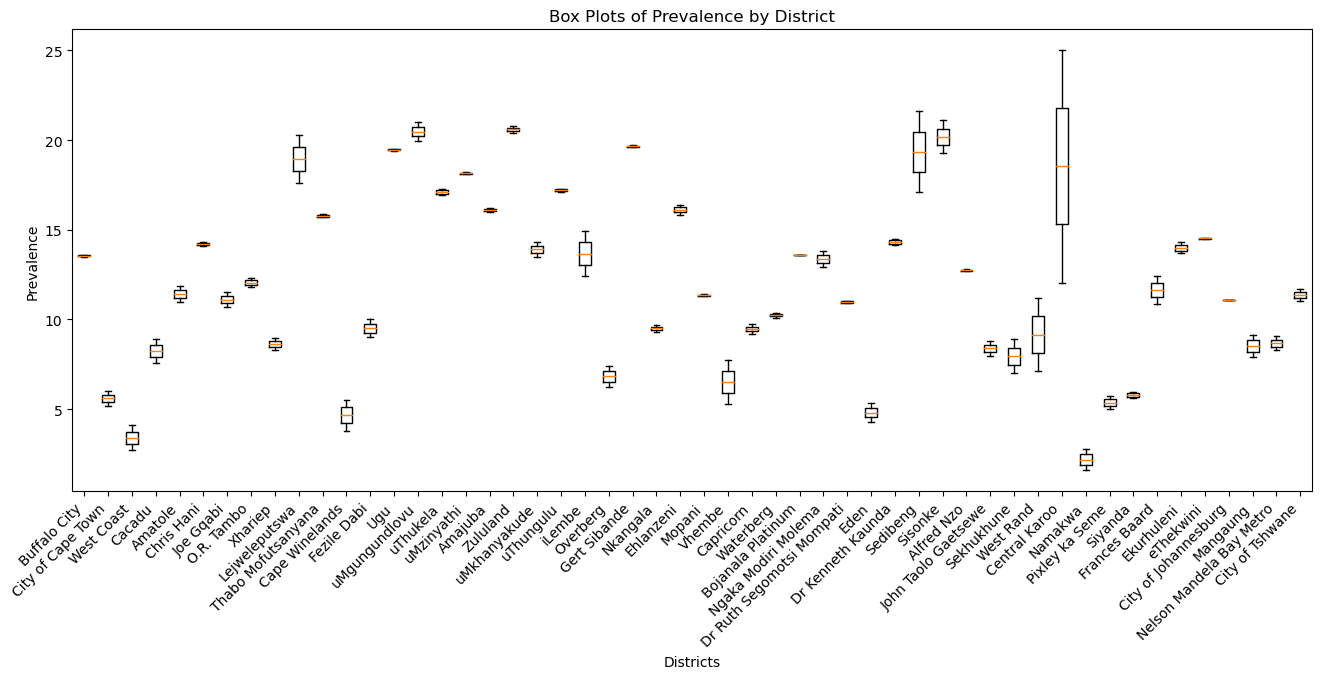

In [18]:
plt.figure(figsize = (16, 6))
# Extracting data from the DataFrame
districts = df['District'].unique()
data = [df[df['District'] == d]['Prevalence'].tolist() for d in districts]

# Create a box plot for different districts on one plot
plt.boxplot(data, labels=districts)
plt.title('Box Plots of Prevalence by District')
plt.xlabel('Districts')
plt.ylabel('Prevalence')
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()
